<div style="background-color:#f0f8ff; padding:15px; border-radius:8px; font-size:16px; line-height:1.6;">

  <h3 style="margin-top:0;">Author: Nikolin Prenga</h3>
  <p><strong>Created:</strong> July 2025</p>

  <p>
    This Jupyter notebook is primarily used to train and validate <strong>YOLOv12</strong> on a custom-annotated dataset derived from <strong>BRISC2025</strong>.
  </p>

  <p>
    The training was conducted in Google Colaboratory using an <strong>L4 GPU</strong>, which significantly reduced training time.
  </p>

  <p>
    Each epoch took approximately one minute to complete, as YOLOv12-small contains roughly <strong>9.4 million parameters</strong>.
  </p>

</div>

In [42]:
#!pip install ultralytics

In [47]:
#!pip install ultralytics
paths='/Users/nikolin/Desktop/Yolo V8-11/Second_Data_set/data.yaml'

import yaml

def read_yaml_file(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)

    print("YAML Content:")
    for key, value in data.items():
        print(f"{key}: {value}")

    return data

read_yaml_file(paths)


YAML Content:
train: Yolo_v11_Nikolin_Dataset/train/images
val: Yolo_v11_Nikolin_Dataset/val/images
nc: 4
names: ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']


{'train': 'Yolo_v11_Nikolin_Dataset/train/images',
 'val': 'Yolo_v11_Nikolin_Dataset/val/images',
 'nc': 4,
 'names': ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']}

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, cv2
#from google.colab.patches import cv2_imshow
from IPython.display import Image
from collections import Counter
from ultralytics import YOLO
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Load a COCO-pretrained YOLOv12 model from ultralytics
Nikolin_Yolo11 = YOLO("yolo12s.pt")




In [ ]:
# Train the YOLOv12s model for 100 epochs using the specified YAML config file for training/validation data.
# Image size is set to 512, batch size to 16, and early stopping is applied with a patience of 10 epochs.

Nikolin_Yolo11.train(
    data="/content/data.yaml",
    epochs=100,
    imgsz=512,
    batch=16,
    name="brain_tumor_yolo",
    device=0,
    patience=10
)


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=brain_tumor_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

 11                  -1  1    345856  ultralytics.nn.modules.block.A2C2f           [768, 256, 1, False, -1]      
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1     95104  ultralytics.nn.modules.block.A2C2f           [512, 128, 1, False, -1]      
 15                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 17                  -1  1    296704  ultralytics.nn.modules.block.A2C2f           [384, 256, 1, False, -1]      
 18                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 19             [-1, 8]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 317MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1372.4±584.4 MB/s, size: 41.9 KB)


train: Scanning /content/Yolo_v11_Nikolin_Dataset/train/labels... 4002 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4002/4002 [00:02<00:00, 1585.24it/s]


train: New cache created: /content/Yolo_v11_Nikolin_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 912.6±442.8 MB/s, size: 33.7 KB)


val: Scanning /content/Yolo_v11_Nikolin_Dataset/val/labels... 998 images, 0 backgrounds, 0 corrupt: 100%|██████████| 998/998 [00:00<00:00, 1310.27it/s]

val: New cache created: /content/Yolo_v11_Nikolin_Dataset/val/labels.cache


Plotting labels to runs/detect/brain_tumor_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/brain_tumor_yolo
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.52G        1.3      2.132       1.52          5        512: 100%|██████████| 251/251 [00:46<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.90it/s]


                   all        998       1036      0.653      0.578      0.616      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.19G      1.378      1.405      1.567          4        512: 100%|██████████| 251/251 [00:42<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]


                   all        998       1036      0.511      0.541       0.55      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.21G       1.35      1.273      1.534          2        512: 100%|██████████| 251/251 [00:41<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]


                   all        998       1036      0.696       0.64      0.668      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.26G      1.318      1.239      1.511          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]


                   all        998       1036      0.681      0.691      0.697      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.3G      1.234      1.136      1.439          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]


                   all        998       1036      0.804      0.777      0.832      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.34G      1.246      1.093      1.457          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]


                   all        998       1036      0.754      0.741       0.78      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.36G      1.185     0.9975      1.405          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]


                   all        998       1036      0.747      0.669      0.736      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.42G        1.2      1.024       1.42          2        512: 100%|██████████| 251/251 [00:41<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.84it/s]


                   all        998       1036      0.797       0.78       0.82      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.46G      1.162     0.9657      1.392          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]


                   all        998       1036      0.775      0.719       0.78      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       4.5G      1.152     0.9409      1.389          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]


                   all        998       1036      0.684      0.753      0.792      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.52G      1.121     0.8893      1.347          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]

                   all        998       1036      0.859      0.797      0.852      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.58G      1.106     0.8876      1.352          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all        998       1036      0.831       0.78      0.846      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.62G      1.118     0.8867      1.362          1        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all        998       1036      0.848      0.801      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.65G      1.115     0.8708      1.351          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]


                   all        998       1036      0.841      0.785      0.845      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.67G      1.068     0.8273      1.335          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all        998       1036      0.848       0.79      0.858      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.73G      1.091     0.8266      1.342          4        512: 100%|██████████| 251/251 [00:41<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all        998       1036      0.853      0.841      0.872      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.77G      1.067     0.8103      1.327          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]


                   all        998       1036      0.873      0.831      0.893      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.81G      1.073     0.8019      1.342          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.872      0.839      0.891      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.83G      1.059     0.7891      1.322          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]


                   all        998       1036      0.877      0.801      0.878      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.89G       1.04     0.7674      1.303          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]


                   all        998       1036       0.84      0.833      0.873      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.93G      1.026     0.7601      1.304          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all        998       1036      0.836      0.802       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.96G      1.033     0.7636        1.3          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]


                   all        998       1036      0.881      0.827      0.886      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.98G      1.038     0.7743       1.31          3        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all        998       1036      0.858      0.834       0.89      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.04G      1.001     0.7323      1.284          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]


                   all        998       1036      0.868      0.827      0.887      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.08G      1.027     0.7474      1.306          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]


                   all        998       1036      0.871      0.834      0.894      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.12G      1.006     0.7216       1.28          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]

                   all        998       1036      0.859      0.845      0.892      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.14G      1.006     0.7256      1.284          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036      0.888      0.829       0.89      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.2G      1.008     0.7064      1.289          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036       0.88      0.836      0.884      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.24G     0.9912     0.7128      1.276          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all        998       1036      0.872      0.856      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.28G      0.993     0.6916      1.278          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]


                   all        998       1036      0.882       0.84      0.897      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.47G     0.9787     0.6972      1.264          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]

                   all        998       1036      0.879      0.851      0.898      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.53G     0.9925     0.6722      1.276          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]


                   all        998       1036      0.876      0.865        0.9      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.57G      0.966      0.668      1.265          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]


                   all        998       1036       0.87      0.858      0.895      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.61G     0.9614     0.6619      1.262          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all        998       1036      0.869       0.87      0.899      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.63G     0.9671     0.6642      1.251          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.884      0.851      0.899       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.69G     0.9759      0.656      1.267          5        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.888      0.826      0.894      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.72G     0.9556     0.6386      1.247          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.86it/s]

                   all        998       1036      0.879      0.869      0.913      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.76G     0.9487     0.6307      1.246          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all        998       1036      0.879      0.863      0.906      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.78G     0.9373     0.6403      1.239          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all        998       1036      0.856       0.86      0.895      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.84G     0.9352     0.6346      1.239          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all        998       1036      0.882      0.874       0.91      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.88G     0.9276     0.6261      1.243          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.874      0.867      0.902      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.92G     0.9364     0.6278      1.239          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all        998       1036      0.882      0.865      0.907       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.94G     0.9332     0.6157      1.235         11        512: 100%|██████████| 251/251 [00:40<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all        998       1036      0.886       0.84      0.893      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         6G     0.9367     0.6088      1.237          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all        998       1036      0.888      0.857      0.906      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.04G     0.9235     0.6129       1.23          3        512: 100%|██████████| 251/251 [00:41<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all        998       1036      0.893      0.864      0.903      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.08G     0.9273     0.6058      1.224          3        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036      0.907      0.862      0.915      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.09G     0.9118     0.6059       1.22          5        512: 100%|██████████| 251/251 [00:41<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]


                   all        998       1036      0.901      0.861      0.908      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.15G     0.9138     0.6005      1.215          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all        998       1036      0.873       0.85      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.19G     0.9307     0.5868      1.228          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all        998       1036      0.906      0.876      0.913      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.23G     0.9251     0.5963      1.223          2        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]


                   all        998       1036      0.888      0.876      0.909      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.25G      0.913     0.5895       1.22          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]

                   all        998       1036      0.901      0.872      0.912      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.31G     0.8806     0.5657        1.2          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all        998       1036      0.892      0.884      0.917      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.35G     0.8961     0.5784      1.213          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all        998       1036       0.89      0.875      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.39G     0.8915      0.567      1.213          3        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.896      0.873      0.915      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.41G     0.8893     0.5658      1.208          5        512: 100%|██████████| 251/251 [00:41<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all        998       1036      0.911      0.861      0.911       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.46G     0.8787     0.5476       1.19          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all        998       1036      0.888      0.891      0.908      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       6.5G     0.8626     0.5412      1.189          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.912      0.882      0.921      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.54G     0.8906     0.5617      1.206          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all        998       1036      0.901      0.883      0.915      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.56G     0.8843     0.5525      1.198          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]


                   all        998       1036       0.91      0.875      0.921      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.62G     0.8592     0.5348      1.183          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]


                   all        998       1036      0.916      0.889      0.926      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.68G     0.8763     0.5363      1.195          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all        998       1036      0.912      0.891      0.924      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.72G     0.8567     0.5248      1.176          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036      0.898      0.882      0.917      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.76G      0.867     0.5363      1.182          4        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.913      0.876      0.919      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.84G     0.8541     0.5346      1.178          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all        998       1036       0.93      0.873      0.924      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       6.9G     0.8605     0.5312      1.184          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all        998       1036      0.896      0.888      0.922      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.94G     0.8489     0.5197      1.174          2        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]

                   all        998       1036      0.913      0.873       0.92      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.98G      0.852     0.5295      1.183          3        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all        998       1036      0.923      0.862      0.916      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.06G     0.8418     0.5148       1.17          1        512: 100%|██████████| 251/251 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]

                   all        998       1036      0.916      0.884       0.92      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       7.1G     0.8549     0.5069      1.182          8        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all        998       1036      0.926      0.884      0.928      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.16G     0.8347     0.5021       1.17          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all        998       1036      0.919      0.898       0.93      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.18G     0.8171     0.4971      1.151          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all        998       1036      0.927      0.894      0.927      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.26G     0.8235     0.4972      1.153          1        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]


                   all        998       1036      0.915      0.891      0.925       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.32G     0.8296     0.4957      1.164          6        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all        998       1036      0.915      0.868      0.921      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.36G     0.8239     0.4865      1.157          1        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]


                   all        998       1036      0.906       0.89      0.925      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       7.4G     0.8191     0.4878      1.151          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all        998       1036      0.919      0.897      0.927      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.48G     0.8209     0.4864      1.154          2        512: 100%|██████████| 251/251 [00:40<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.918        0.9       0.92      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.52G     0.8097     0.4943      1.147          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all        998       1036      0.917       0.89      0.924      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.58G     0.8133      0.485      1.151          3        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all        998       1036       0.91      0.893      0.918      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.62G     0.8068     0.4737      1.149          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all        998       1036      0.919       0.89      0.925      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.7G     0.8021     0.4706      1.142          6        512: 100%|██████████| 251/251 [00:40<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036      0.921      0.882       0.92      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.74G     0.7886     0.4706       1.14          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all        998       1036      0.916      0.891      0.923      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       7.8G     0.7948     0.4627      1.143          7        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all        998       1036      0.925      0.896      0.926      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.84G     0.7894     0.4626      1.139          5        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all        998       1036      0.922      0.888      0.923      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       7.9G     0.7866     0.4627      1.138          6        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.933      0.889      0.926      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.96G     0.7876     0.4614      1.135          1        512: 100%|██████████| 251/251 [00:41<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all        998       1036      0.915      0.899      0.927      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.02G      0.777     0.4605      1.129          1        512: 100%|██████████| 251/251 [00:41<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]

                   all        998       1036      0.926      0.881      0.928      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.21G     0.7773     0.4541      1.128          5        512: 100%|██████████| 251/251 [00:41<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all        998       1036      0.922      0.888      0.928      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.27G     0.7647     0.4501       1.12          4        512: 100%|██████████| 251/251 [00:40<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all        998       1036      0.909       0.89      0.926      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.31G     0.7765     0.4533      1.133          7        512: 100%|██████████| 251/251 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]

                   all        998       1036      0.921      0.892      0.924      0.685


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 79, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

89 epochs completed in 1.160 hours.
Optimizer stripped from runs/detect/brain_tumor_yolo/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/brain_tumor_yolo/weights/best.pt, 18.9MB

Validating runs/detect/brain_tumor_yolo/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.76it/s]


                   all        998       1036      0.921       0.89      0.925      0.689
                Glioma        229        247      0.851      0.777      0.842       0.53
            Meningioma        265        275      0.962      0.925      0.971      0.745
             Pituitary        291        301      0.934      0.899      0.926      0.601
              No Tumor        213        213      0.938      0.958      0.961      0.881
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/brain_tumor_yolo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c5779abcb90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# Load the best-performing YOLOv12 model saved during training (based on validation performance)

best_model_path = 'YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/weights/best.pt'


best_model = YOLO(best_model_path)

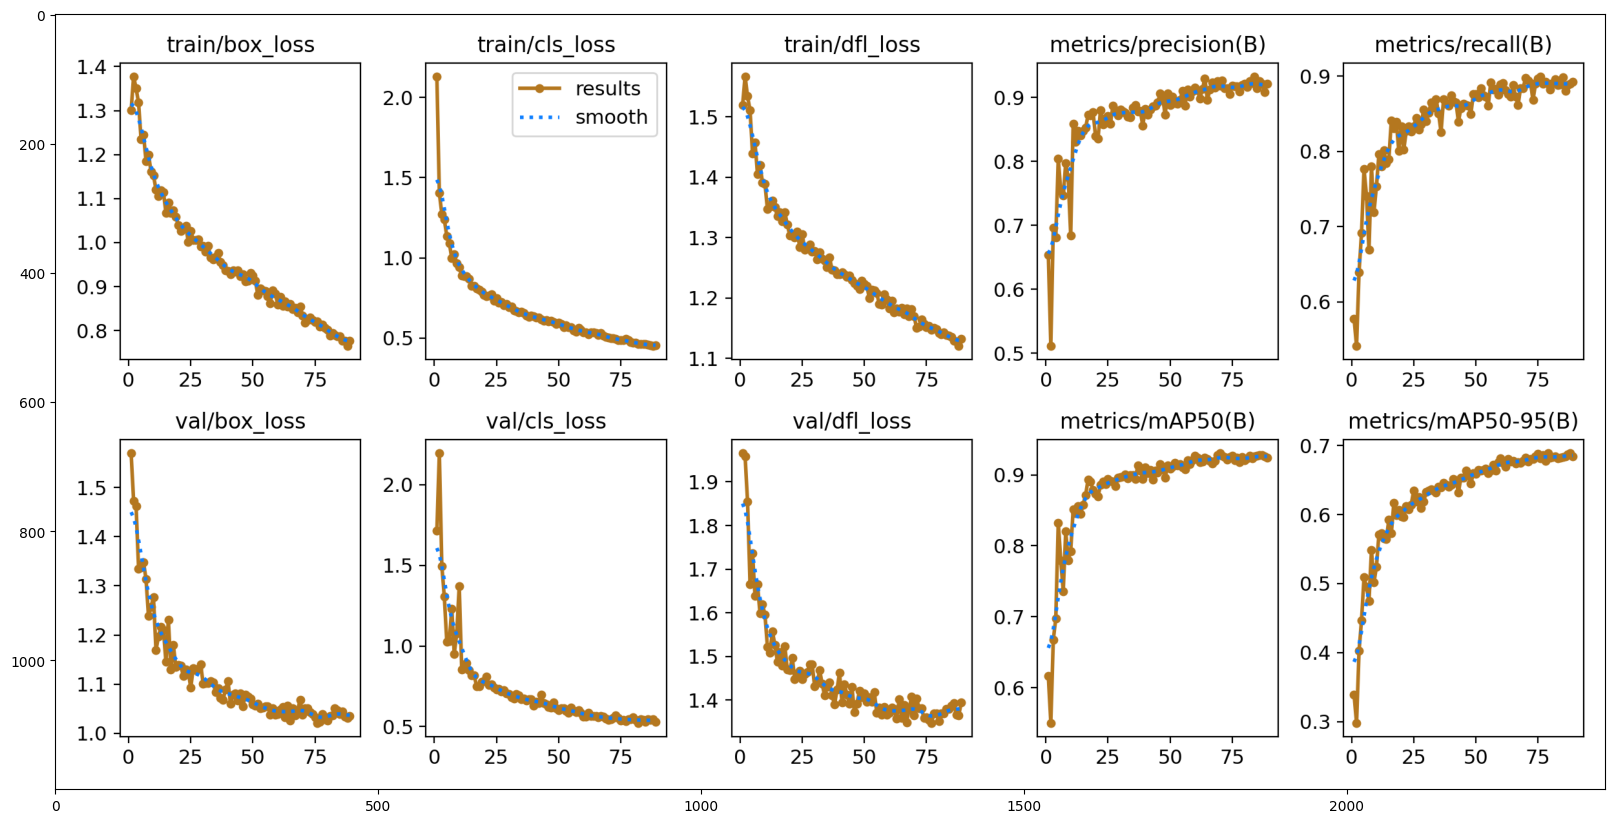

In [ ]:
# Load and display the training and validation metrics image (e.g. losses, precision, recall) generated by YOLOv11 after training


ims = cv2.imread('/Users/nikolin/Desktop/Yolo V8-11/First Try/YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/results.png')

plt.figure(figsize=(20, 20))
plt.imshow(ims)
plt.show()


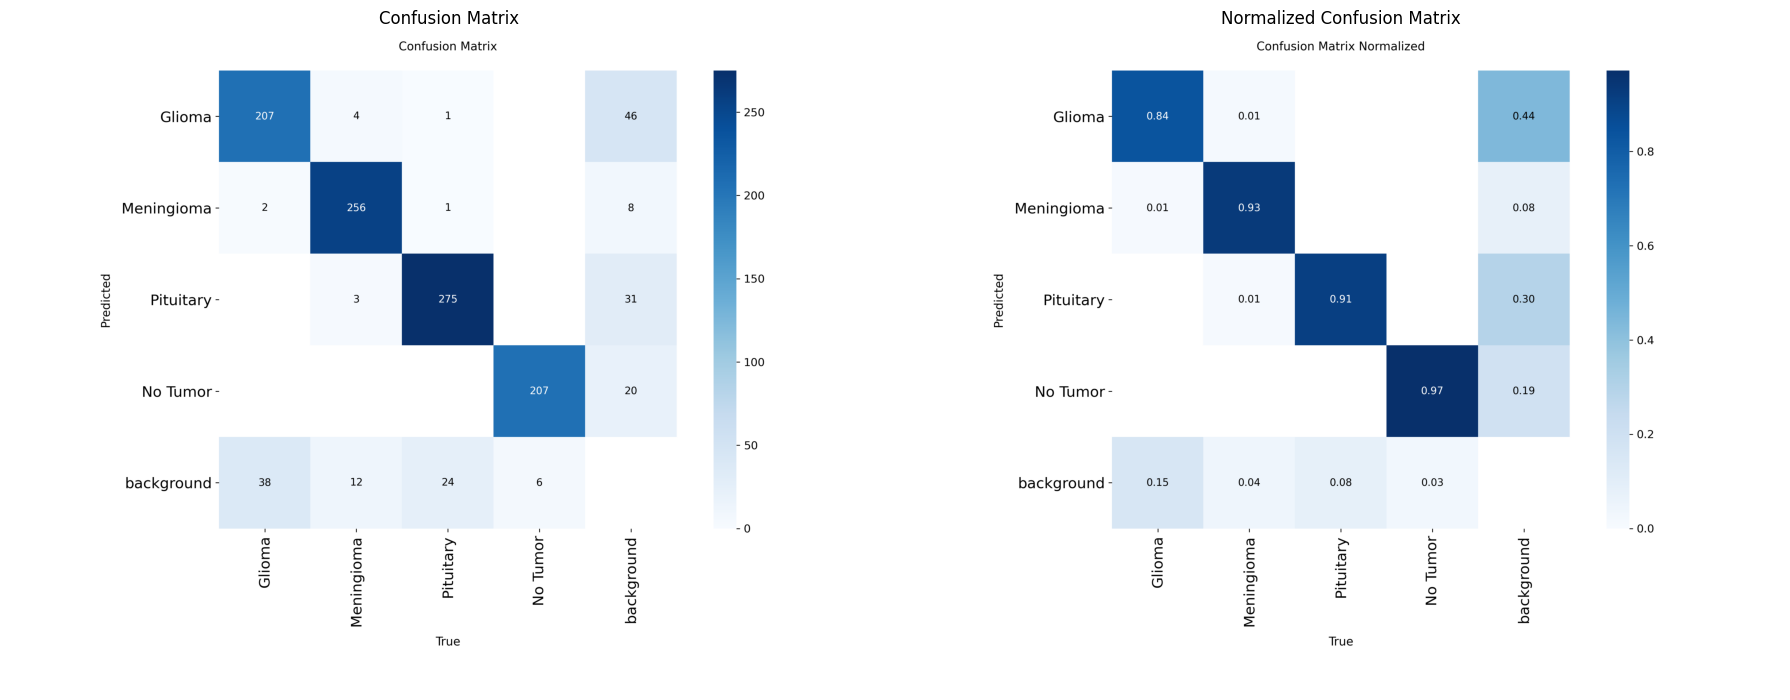

In [25]:
path_conf_matrix_v12 ='YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/confusion_matrix.png'
path_conf_matrix_normalized_v12='YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/confusion_matrix_normalized.png'

conf_v12 = plt.imread(path_conf_matrix_v12)
conf_v12_normalized = plt.imread(path_conf_matrix_normalized_v12)

plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(conf_v12)
plt.title('Confusion Matrix')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(conf_v12_normalized)
plt.title('Normalized Confusion Matrix')
plt.axis('off')
plt.tight_layout()      
plt.show()

# F1 score across thresholds

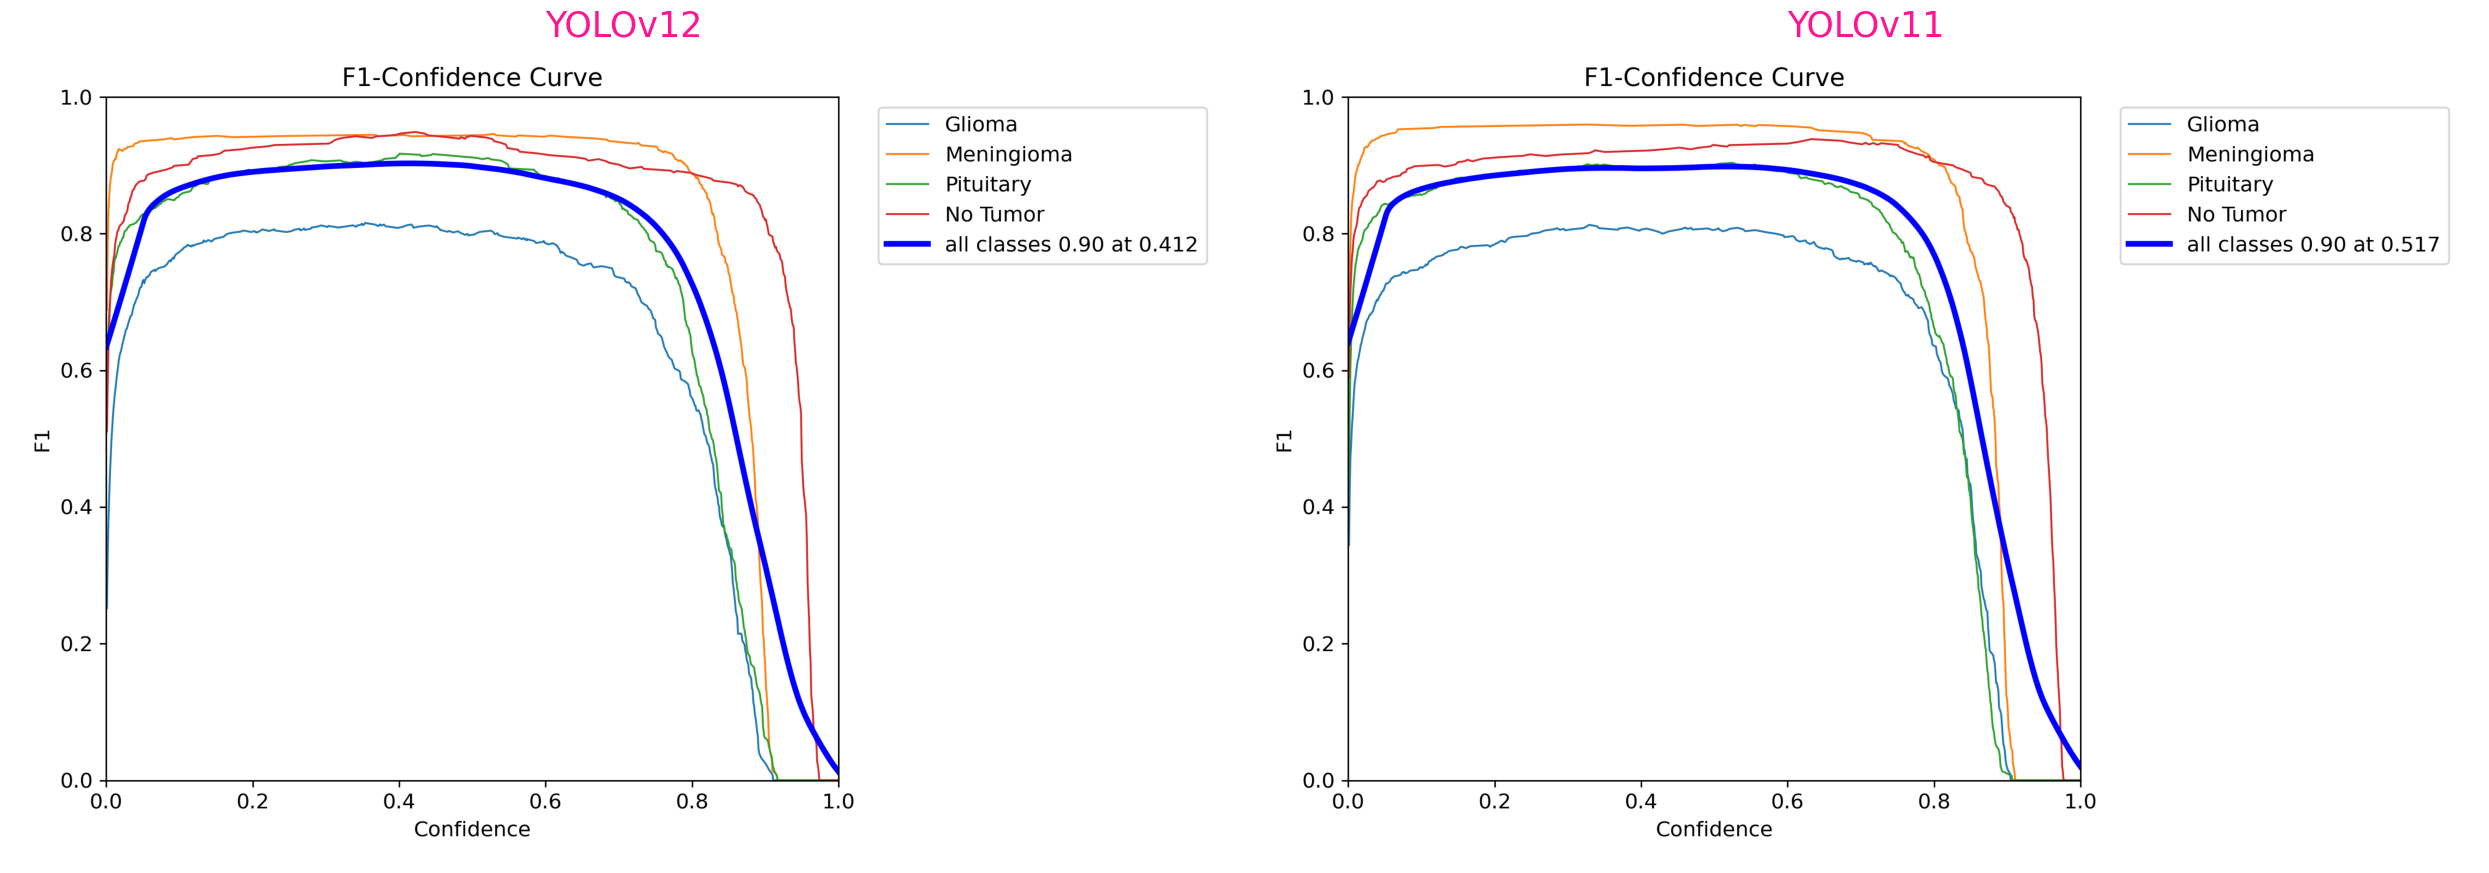

In [31]:
F1_score_v12_path = 'YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/BoxF1_curve.png'

F1_score_v11_path = '/Users/nikolin/Desktop/Yolo V8-11/Second_Data_set/Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/BoxF1_curve.png'

F1_score_im_v12 = plt.imread(F1_score_v12_path)

F1_score_im_v11 = plt.imread(F1_score_v11_path)


plt.figure(figsize = (25,20))

plt.subplot(1,2,1)
plt.imshow(F1_score_im_v12)
plt.title('YOLOv12', fontsize = 25, c='deeppink')
plt.axis('off')
plt.subplot(1,2,2)

plt.imshow(F1_score_im_v11)
plt.title('YOLOv11', fontsize = 25, c='deeppink')
plt.axis('off')
plt.tight_layout()
plt.show()


# Precision vs. confidence threshold

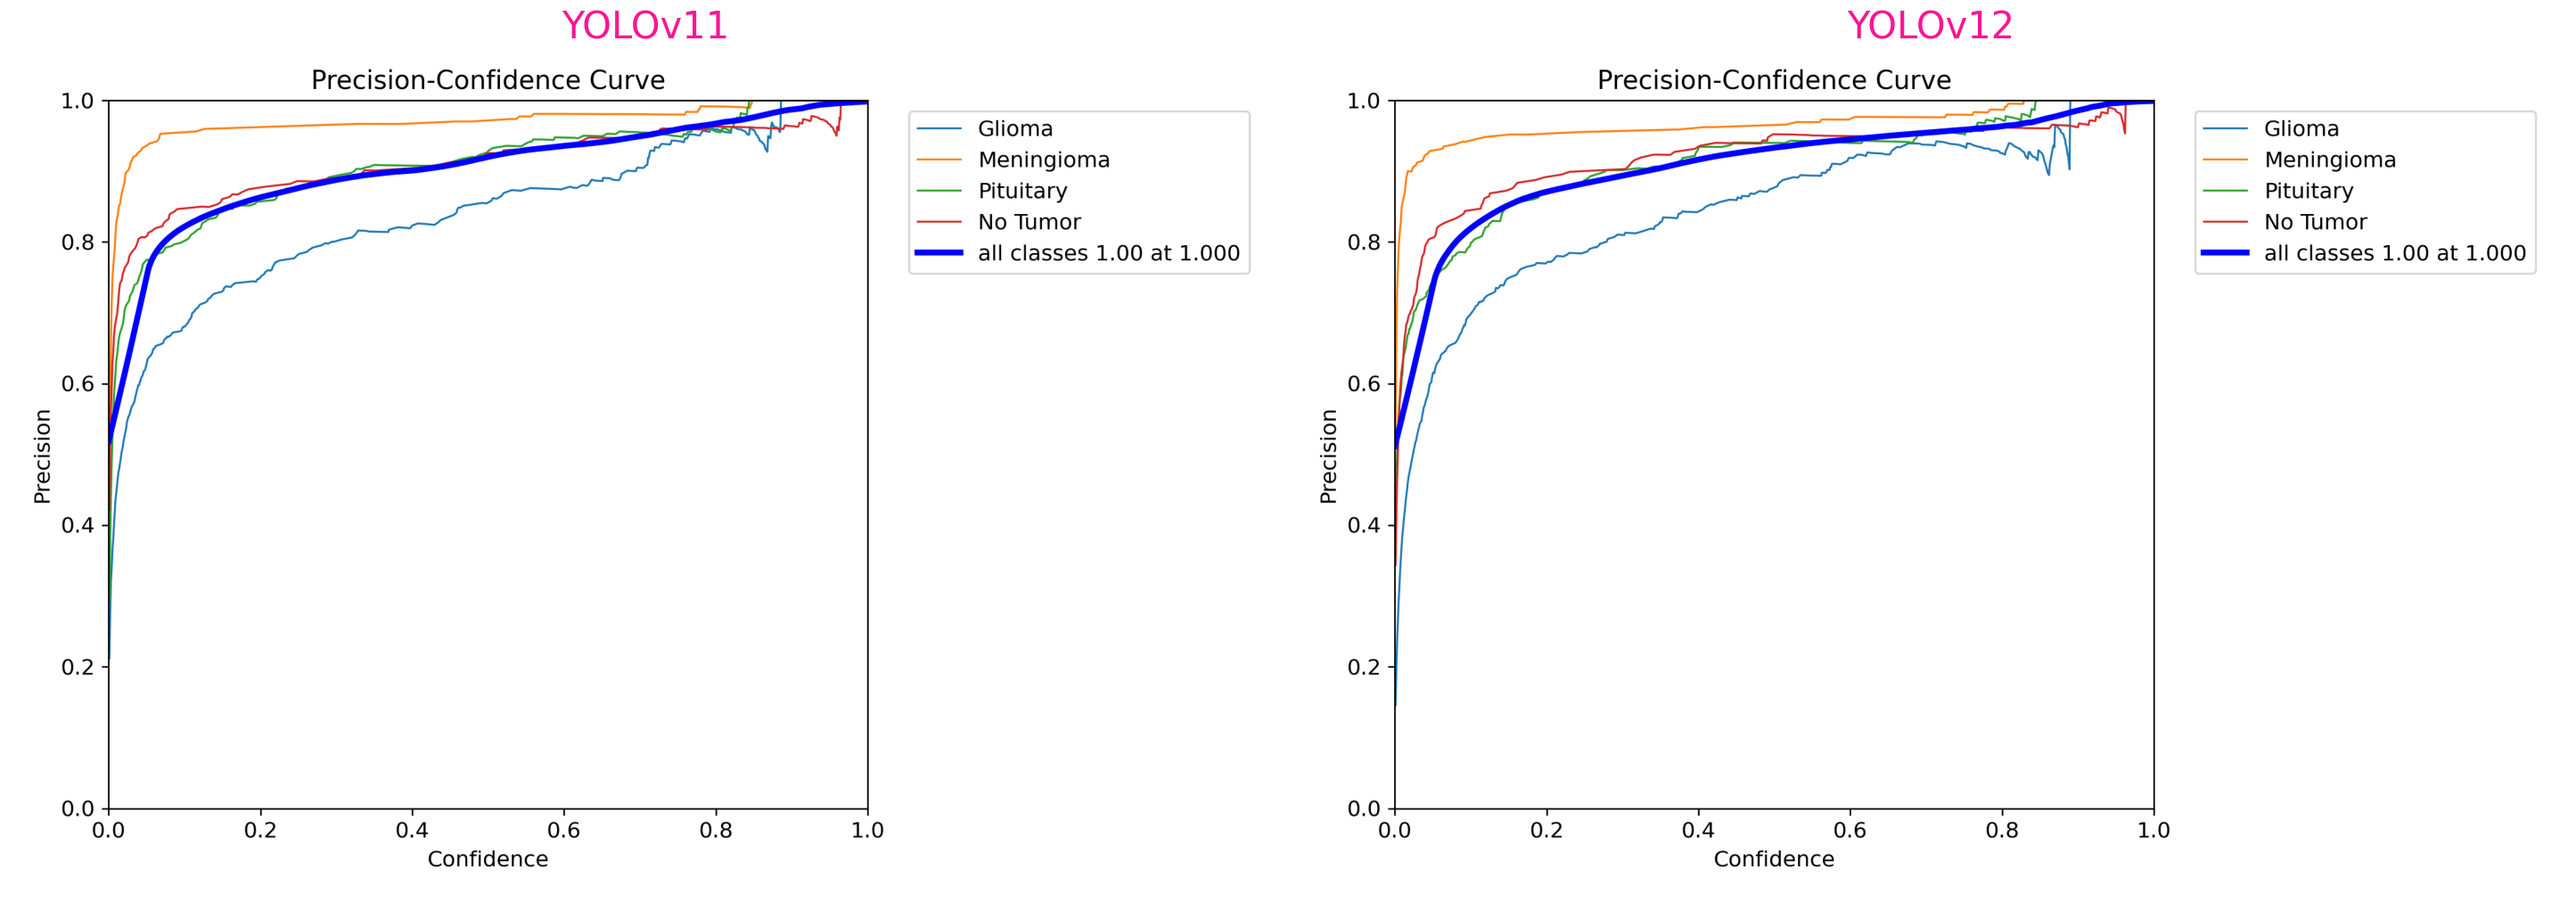

In [41]:
precision_v12_path = 'YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/BoxP_curve.png'
precision_v11_path ='/Users/nikolin/Desktop/Yolo V8-11/Second_Data_set/Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/BoxP_curve.png'


precision_v11 = plt.imread(precision_v11_path)

precision_v12 = plt.imread(precision_v12_path)


plt.figure(figsize=(29,15))

plt.subplot(1,2,1)
plt.imshow(precision_v11)
plt.title('YOLOv11', fontsize=30, c='deeppink')
plt.axis('off')


plt.subplot(1,2,2)

plt.imshow(precision_v12)
plt.title('YOLOv12', fontsize=30, c='deeppink')

plt.axis('off')

plt.tight_layout()